## # To do 부정리뷰 워드클라우드

부정리뷰 워드클라우드를 생성해주세요!

In [1]:
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings(action='ignore')
import nltk
# nltk.download('all') # 처음 실행 시 주석을 제거하고 실행해주세요!

In [2]:
data = pd.read_csv('data/train.csv') # train 데이터 불러오기
data.head() # 데이터 확인하기

,id,document,label
0,1,영상이나 음악이 이쁘다 해도 미화시킨 불륜일뿐,0
1,2,히치콕이 이 영화를 봤다면 분명 박수를 쳤을듯...,1
2,3,괜찮은 음악영화가 또 나왔군요!!! 따뜻한 겨울이 될 것 같아요~,1
3,4,아무래도 20년도지난작품이라 지금보기는너무유치하다,0
4,5,지금까지의 영화들이 그랬듯. 이 영화역시 일본에 대한 미화는 여전하다.,0


In [3]:
data.isna().sum() # 결측치 확인

id          0
document    0
label       0
dtype: int64

In [4]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(data)
train.reset_index(inplace=True) # 전처리 과정에서 데이터가 뒤섞이지 않도록 인덱스를 초기화해주었습니다.
val.reset_index(inplace=True)

In [5]:
train # train 셋 확인

,index,id,document,label
0,348,349,배우가아닌 진짜합창단이해서 감동이에요!코러스 최고,1
1,667,668,이걸 재밋다고 하는거 보면 어휴..,0
2,1212,1213,재미는없다!! 1점준것중에 한국영화는 죄다 9~10점준 M창있네,0
3,2681,2682,한국영화중 가장 매끄럽게 만들어진 영화!,1
4,4847,4848,마음이 아프기도 하고 따뜻해지기도 하는 엽서 같은 영화,1
...,...,...,...,...
3745,3766,3767,독립영화계에 최악의 영화 지루하다 정말 지루하다,0
3746,4710,4711,쥐어짜내는 억지 감동은 이젠 그만.,0
3747,628,629,불쌍한 인디.... 에휴... 어쩌다 이래됐누..,0
3748,2987,2988,매혹이 나니라.. 가혹 일쎄 ...,0


In [6]:
train['preprocessed'] = train['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 한글과 공백을 제외하고 모두 제거
train[:5] # 데이터 확인

,index,id,document,label,preprocessed
0,348,349,배우가아닌 진짜합창단이해서 감동이에요!코러스 최고,1,배우가아닌 진짜합창단이해서 감동이에요코러스 최고
1,667,668,이걸 재밋다고 하는거 보면 어휴..,0,이걸 재밋다고 하는거 보면 어휴
2,1212,1213,재미는없다!! 1점준것중에 한국영화는 죄다 9~10점준 M창있네,0,재미는없다 점준것중에 한국영화는 죄다 점준 창있네
3,2681,2682,한국영화중 가장 매끄럽게 만들어진 영화!,1,한국영화중 가장 매끄럽게 만들어진 영화
4,4847,4848,마음이 아프기도 하고 따뜻해지기도 하는 엽서 같은 영화,1,마음이 아프기도 하고 따뜻해지기도 하는 엽서 같은 영화


In [7]:
train['preprocessed'] = train['preprocessed'].str.replace("[\s]+", " ") # 다중 공백 제거
train[:5] # 데이터 확인

,index,id,document,label,preprocessed
0,348,349,배우가아닌 진짜합창단이해서 감동이에요!코러스 최고,1,배우가아닌 진짜합창단이해서 감동이에요코러스 최고
1,667,668,이걸 재밋다고 하는거 보면 어휴..,0,이걸 재밋다고 하는거 보면 어휴
2,1212,1213,재미는없다!! 1점준것중에 한국영화는 죄다 9~10점준 M창있네,0,재미는없다 점준것중에 한국영화는 죄다 점준 창있네
3,2681,2682,한국영화중 가장 매끄럽게 만들어진 영화!,1,한국영화중 가장 매끄럽게 만들어진 영화
4,4847,4848,마음이 아프기도 하고 따뜻해지기도 하는 엽서 같은 영화,1,마음이 아프기도 하고 따뜻해지기도 하는 엽서 같은 영화


In [8]:
from konlpy.tag import Okt
okt = Okt()

In [9]:
tokenized = [] # 데이터프레임의 한 컬럼으로 추가할 리스트
for sentence in train['preprocessed']: # 전처리된 리뷰들을 하나씩 꺼내옵니다
    # To do
    tokens = okt.morphs(sentence, stem=True)# 형태소 분석 (어간 추출로 옵션 설정)
    tokenize = " ".join(tokens) # tokens라는 리스트 안의 형태소들을 띄어쓰기로 분리된 하나의 문자열로 join시켜줍니다.
    tokenized.append(tokenize) # 형태소 단위로 띄어쓰기된 문자열을 최종 리스트에 추가해줍니다
train["tokenized_stem"] = pd.DataFrame(tokenized) # 리스트를 데이터프레임으로 변환해 tokenized_stem라는 컬럼명으로 추가해줍니다.

train.head() # 데이터 확인

,index,id,document,label,preprocessed,tokenized_stem
0,348,349,배우가아닌 진짜합창단이해서 감동이에요!코러스 최고,1,배우가아닌 진짜합창단이해서 감동이에요코러스 최고,배우 가 아니다 진짜 합창단 이해 서 감동 이에요 코러스 최고
1,667,668,이걸 재밋다고 하는거 보면 어휴..,0,이걸 재밋다고 하는거 보면 어휴,이 걸 재밋다 고 하다 보다 어휴
2,1212,1213,재미는없다!! 1점준것중에 한국영화는 죄다 9~10점준 M창있네,0,재미는없다 점준것중에 한국영화는 죄다 점준 창있네,재미 는 없다 점 주다 중 에 한국영 화 는 죄다 점준 창 있다
3,2681,2682,한국영화중 가장 매끄럽게 만들어진 영화!,1,한국영화중 가장 매끄럽게 만들어진 영화,한국영 화중 가장 매끄럽다 만들어지다 영화
4,4847,4848,마음이 아프기도 하고 따뜻해지기도 하는 엽서 같은 영화,1,마음이 아프기도 하고 따뜻해지기도 하는 엽서 같은 영화,마음 이 아프다 기도 하다 따뜻하다 기도 하다 엽서 같다 영화


In [10]:
#### 품사 사용 범위 확인

main_pos = [] # 데이터프레임의 새 컬럼이 될 리스트
for sentence in train['document']: # 리뷰들을 하나씩 가져옵니다
    # To do
    pos = okt.pos(sentence)# 품사 태깅으로 형태소 분석을 진행하고 해당 리스트를 pos라는 변수로 받습니다
    main_words = [word_pos[0] for word_pos in pos if word_pos[1] in ("Noun", "Adverb", "Adjective", "Verb")] # 가져오고자 하는 품사에 해당하면 해당 형태소를 main_words 리스트에 추가합니다.
    main_words_str = " ".join(main_words) # main_words 리스트 안의 형태소들을 띄어쓰기로 분리된 하나의 문자열로 join시켜줍니다.
    main_pos.append(main_words_str) # 선택한 형태소들로 이루어진 문자열을 최종 리스트에 추가해줍니다
train["main_pos"] = pd.DataFrame(main_pos) # 리스트를 데이터프레임으로 변환해 main_pos라는 컬럼명으로 추가해줍니다.

train.head() # 데이터 확인

,index,id,document,label,preprocessed,tokenized_stem,main_pos
0,348,349,배우가아닌 진짜합창단이해서 감동이에요!코러스 최고,1,배우가아닌 진짜합창단이해서 감동이에요코러스 최고,배우 가 아니다 진짜 합창단 이해 서 감동 이에요 코러스 최고,배우 아닌 진짜 합창단 이해 감동 코러스 최고
1,667,668,이걸 재밋다고 하는거 보면 어휴..,0,이걸 재밋다고 하는거 보면 어휴,이 걸 재밋다 고 하다 보다 어휴,걸 재밋다 하는거 보면
2,1212,1213,재미는없다!! 1점준것중에 한국영화는 죄다 9~10점준 M창있네,0,재미는없다 점준것중에 한국영화는 죄다 점준 창있네,재미 는 없다 점 주다 중 에 한국영 화 는 죄다 점준 창 있다,재미 없다 점 준것 중 한국영 죄다 점준 창 있네
3,2681,2682,한국영화중 가장 매끄럽게 만들어진 영화!,1,한국영화중 가장 매끄럽게 만들어진 영화,한국영 화중 가장 매끄럽다 만들어지다 영화,한국영 화중 가장 매끄럽게 만들어진 영화
4,4847,4848,마음이 아프기도 하고 따뜻해지기도 하는 엽서 같은 영화,1,마음이 아프기도 하고 따뜻해지기도 하는 엽서 같은 영화,마음 이 아프다 기도 하다 따뜻하다 기도 하다 엽서 같다 영화,마음 아프 기도 하고 따뜻해지 기도 하는 엽서 같은 영화


In [11]:
X_train = train.main_pos #training 데이터에서 문서 추출
y_train = train.label #training 데이터에서 라벨 추출

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
# To do
vectorizer = CountVectorizer() #countvectorizer 생성
# countvectorizer 학습
vectorizer.fit(X_train)
X_train_vec = vectorizer.transform(X_train) # transform

In [13]:
from sklearn.linear_model import LogisticRegression #모델 불러오기
model = LogisticRegression() #객체에 모델 할당
model.fit(X_train_vec, y_train) #모델 학습

LogisticRegression()

### 검증셋으로 모델 성능 검증

먼저 검증 셋 val에 train 셋과 동일한 전처리 과정을 거쳐줍니다.

In [14]:
# preprocessed
val['preprocessed'] = val['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 한글과 공백을 제외하고 모두 제거
val['preprocessed'] = val['preprocessed'].str.replace(" +", " ") # 다중 공백 제거

# tokenized_stem
tokenized = []
for sentence in val['preprocessed']:
    # To do
    tokens = okt.morphs(sentence, stem=True) #형태소 분석 어간 추출 옵션
    tokenize = " ".join(tokens)
    tokenized.append(tokenize)
val["tokenized_stem"] = pd.DataFrame(tokenized)

# main_pos
main_pos = []
for sentence in val['document']:
    # To do
    pos = okt.pos(sentence) # 품사 태깅 형태소 분석
    main_words = [word[0] for word in pos if word[1] in ('Noun', 'Adjective', 'Adverb', 'Verb')]
     # 원하는 품사 선택
    main_words_str = " ".join(main_words)
    main_pos.append(main_words_str)
val["main_pos"] = pd.DataFrame(main_pos)

val.head()

,index,id,document,label,preprocessed,tokenized_stem,main_pos
0,2215,2216,다알바생임? 나 완전 잼없게 봤는데;ㅋㅋ,0,다알바생임 나 완전 잼없게 봤는데ㅋㅋ,다 알바생 임 나 완전 잼 없다 보다 ㅋㅋ,다 알바생 임 나 완전 잼 없게 봤는데
1,940,941,"류시원, 이세창도 재미없다 했을껄~~~",0,류시원 이세창도 재미없다 했을껄,류시원 이세창 도 재미없다 했을껄,류시원 이세창 재미없다 했을껄
2,4823,4824,슬픈여운이 너무 길어서 슬픈영화.,1,슬픈여운이 너무 길어서 슬픈영화,슬프다 여운 이 너무 기다 슬프다 영화,슬픈 여운 너무 길어서 슬픈 영화
3,609,610,그저 그런 헐리우드 재난영화에 속하는 영화,0,그저 그런 헐리우드 재난영화에 속하는 영화,그저 그렇다 헐리우드 재난영화 에 속 하다 영화,그저 그런 헐리우드 재난영화 속 하는 영화
4,1184,1185,"지나가다보았는데, 좀비인줄알았음..",0,지나가다보았는데 좀비인줄알았음,지나가다 보다 좀비 인 줄 알다,지나가다 보았는데 좀비 줄 알았음


학습한 모델로 예측할 X를 벡터화해줍니다.

In [15]:
X_val = val.main_pos #validation 데이터에서 전처리된 문서 추출
y_val = val.label #validation 데이터에서 라벨 추출
# To do
X_val_vec = vectorizer.transform(X_val)# train셋으로 fit한 벡터라이저 이용해 transform

In [16]:
#run model
y_pred = model.predict(X_val_vec)
print(y_pred)
#0:negative 1:positive

[1 0 1 ... 0 0 1]


In [17]:
from sklearn import metrics
print('accuracy =', metrics.accuracy_score(y_val, y_pred)) # 정확도 확인

accuracy = 0.8184


# test.csv 분류하기

In [18]:
test = pd.read_csv('data/test.csv')
test

,id,document
0,1,시간 때우기 좋은 영화 지루함
1,2,훈훈한 정이 느껴지는 영화! 가족끼리 드라마 보듯이 보면 딱~!
2,3,Childhood fantasy
3,4,멋있는 영화입니다. 잊을 수 없는!
4,5,너무 감동적이네요 펑펑 울었습니다
...,...,...
4995,4996,연계도 제대로 안되고 뭔가 부족한느낌이들고 찝찝한영화
4996,4997,내생에 최악의 영화중 하나 졸려서 미칠뻔....
4997,4998,지금까지 나온 드라마 중 최고였습니다. 100점 만점!
4998,4999,영화값으로 엄청난 공연을 보았다 - 이게 웬 횡재 ..


동일한 전처리 과정을 거치되, data leakage가 발생하지 않도록 주의합니다.

In [19]:
test.isna().sum()

id          0
document    0
dtype: int64

In [20]:
# preprocessed
test['preprocessed'] = test['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 한글과 공백을 제외하고 모두 제거
test['preprocessed'] = test['preprocessed'].str.replace(" +", " ") # 다중 공백 제거

# tokenized_stem
tokenized = []
for sentence in test['preprocessed']:
    # To do
    tokens = okt.morphs(sentence, stem=True)#형태소 분석, 어간 추출
    tokenize = " ".join(tokens)
    tokenized.append(tokenize)
test["tokenized_stem"] = pd.DataFrame(tokenized)

# main_pos
main_pos = []
for sentence in test['document']:
  # To do
    pos = okt.pos(sentence)#품사 태그
    main_words = [word[0] for word in pos if word[1] in ['Noun', 'Adverb', 'Adjective', 'Verb']] # 원하는 품사 추출
    main_words_str = " ".join(main_words)
    main_pos.append(main_words_str)
test["main_pos"] = pd.DataFrame(main_pos)

test.head()

,id,document,preprocessed,tokenized_stem,main_pos
0,1,시간 때우기 좋은 영화 지루함,시간 때우기 좋은 영화 지루함,시간 때우다 좋다 영화 지루함,시간 때우기 좋은 영화 지루함
1,2,훈훈한 정이 느껴지는 영화! 가족끼리 드라마 보듯이 보면 딱~!,훈훈한 정이 느껴지는 영화 가족끼리 드라마 보듯이 보면 딱,훈훈하다 정이 느껴지다 영화 가족 끼리 드라마 보다 보다 딱,훈훈한 정이 느껴지는 영화 가족 끼리 드라마 보듯이 보면 딱
2,3,Childhood fantasy,,,
3,4,멋있는 영화입니다. 잊을 수 없는!,멋있는 영화입니다 잊을 수 없는,멋있다 영화 이다 잊다 수 없다,멋있는 영화 입니다 잊을 수 없는
4,5,너무 감동적이네요 펑펑 울었습니다,너무 감동적이네요 펑펑 울었습니다,너무 감동 적다 펑펑 울다,너무 감동 적이네요 펑펑 울었습니다


In [21]:
X_test = test.main_pos
# To do
X_test_vec = vectorizer.transform(X_test) # train셋으로 fit한 벡터라이저 이용해 transform
pred_test = model.predict(X_test_vec)
print(pred_test)

[0 1 0 ... 1 1 0]


# 워드클라우드

In [22]:
test['pred']=pred_test

In [23]:
test

,id,document,preprocessed,tokenized_stem,main_pos,pred
0,1,시간 때우기 좋은 영화 지루함,시간 때우기 좋은 영화 지루함,시간 때우다 좋다 영화 지루함,시간 때우기 좋은 영화 지루함,0
1,2,훈훈한 정이 느껴지는 영화! 가족끼리 드라마 보듯이 보면 딱~!,훈훈한 정이 느껴지는 영화 가족끼리 드라마 보듯이 보면 딱,훈훈하다 정이 느껴지다 영화 가족 끼리 드라마 보다 보다 딱,훈훈한 정이 느껴지는 영화 가족 끼리 드라마 보듯이 보면 딱,1
2,3,Childhood fantasy,,,,0
3,4,멋있는 영화입니다. 잊을 수 없는!,멋있는 영화입니다 잊을 수 없는,멋있다 영화 이다 잊다 수 없다,멋있는 영화 입니다 잊을 수 없는,1
4,5,너무 감동적이네요 펑펑 울었습니다,너무 감동적이네요 펑펑 울었습니다,너무 감동 적다 펑펑 울다,너무 감동 적이네요 펑펑 울었습니다,1
...,...,...,...,...,...,...
4995,4996,연계도 제대로 안되고 뭔가 부족한느낌이들고 찝찝한영화,연계도 제대로 안되고 뭔가 부족한느낌이들고 찝찝한영화,연 계 도 제대로 안되다 뭔가 부족하다 느낌 이 들다 찝찝하다 영화,계 제대로 안되고 뭔가 부족한 느낌 들고 찝찝한 영화,0
4996,4997,내생에 최악의 영화중 하나 졸려서 미칠뻔....,내생에 최악의 영화중 하나 졸려서 미칠뻔,내생 에 최악 의 영화 중 하나 졸리다 미치다 뻔,내생 최악 영화 하나 졸려서 미칠 뻔,0
4997,4998,지금까지 나온 드라마 중 최고였습니다. 100점 만점!,지금까지 나온 드라마 중 최고였습니다 점 만점,지금 까지 나오다 드라마 중 최고 이다 점 만점,지금 나온 드라마 중 최고 였습니다 점 만점,1
4998,4999,영화값으로 엄청난 공연을 보았다 - 이게 웬 횡재 ..,영화값으로 엄청난 공연을 보았다 이게 웬 횡재,영화 값 으로 엄청나다 공연 을 보다 이 게 웬 횡재,영화 값 엄청난 공연 보았다 이 웬 횡재,1


In [24]:
df=test.copy()

In [25]:
import pandas as pd
import re

from wordcloud import WordCloud, STOPWORDS

from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

from konlpy.tag import Okt
from collections import Counter

import matplotlib.font_manager as fm

fontpath = 'data/BMHANNA.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='BMHANNA')

In [26]:
pos = df[df['pred']==1] #긍정리뷰
neg = df[df['pred']==0] #부정리뷰

In [27]:
display(pos.head())
display(neg.head())

,id,document,preprocessed,tokenized_stem,main_pos,pred
1,2,훈훈한 정이 느껴지는 영화! 가족끼리 드라마 보듯이 보면 딱~!,훈훈한 정이 느껴지는 영화 가족끼리 드라마 보듯이 보면 딱,훈훈하다 정이 느껴지다 영화 가족 끼리 드라마 보다 보다 딱,훈훈한 정이 느껴지는 영화 가족 끼리 드라마 보듯이 보면 딱,1
3,4,멋있는 영화입니다. 잊을 수 없는!,멋있는 영화입니다 잊을 수 없는,멋있다 영화 이다 잊다 수 없다,멋있는 영화 입니다 잊을 수 없는,1
4,5,너무 감동적이네요 펑펑 울었습니다,너무 감동적이네요 펑펑 울었습니다,너무 감동 적다 펑펑 울다,너무 감동 적이네요 펑펑 울었습니다,1
6,7,친구한테 추천받고 본 영화이지만 내가 남들한테 추천하는 영화,친구한테 추천받고 본 영화이지만 내가 남들한테 추천하는 영화,친구 한테 추천 받다 보다 영화 이지만 내 가 남 들 한테 추천 하다 영화,친구 추천 받고 본 영화 내 남 추천 하는 영화,1
8,9,강배우 엄청난데... 여군버전으로 다시 안 찍나,강배우 엄청난데 여군버전으로 다시 안 찍나,강 배우 엄청나다 여군 버전 으로 다시 안 찍 나,강 배우 엄청난데 여군 버전 다시 안 찍,1


,id,document,preprocessed,tokenized_stem,main_pos,pred
0,1,시간 때우기 좋은 영화 지루함,시간 때우기 좋은 영화 지루함,시간 때우다 좋다 영화 지루함,시간 때우기 좋은 영화 지루함,0
2,3,Childhood fantasy,,,,0
5,6,어이 김구라 자세좀 똑바로 앉어방송마다 왜케 삐딱하게 앉는거지,어이 김구라 자세좀 똑바로 앉어방송마다 왜케 삐딱하게 앉는거지,어이 김구라 자세 좀 똑바로 앉다 방송 마다 왜케 삐 딱하다 앉다,어이 김구라 자세 좀 똑바로 앉어 방송 왜케 삐 딱하게 앉는거지,0
7,8,머 내용은 그닥... 특별하지않다,머 내용은 그닥 특별하지않다,머 내용 은 그닥 특별하다 않다,머 내용 그닥 특별하지 않다,0
9,10,이렇게 재밋게본 드라마 추노말거 없엇음 ㅜ짱,이렇게 재밋게본 드라마 추노말거 없엇음 ㅜ짱,이렇게 재밋게본 드라마 추다 없엇음 ㅜ 짱,이렇게 재밋게본 드라마 추노말거 없엇음 짱,0


## 부정리뷰 워드클라우드

In [28]:
okt = Okt()

content_list = list(neg['main_pos'])
noun_list = []

for sentence in content_list:


    sentence = re.sub('[a-zA-z0-9]','', sentence)
    
    for word, tag in okt.pos(sentence):
      # 명사만 추출
        if tag in ['Noun']:  

            if len(word) == 1:
                continue

            else:
                noun_list.append(word)

count = Counter(noun_list)
negwords = dict(count.most_common(n=50)) 

In [29]:
negwords

{'영화': 794,
 '평점': 132,
 '진짜': 130,
 '스토리': 120,
 '시간': 107,
 '내용': 103,
 '재미': 103,
 '감독': 87,
 '최악': 84,
 '그냥': 82,
 '쓰레기': 78,
 '정말': 77,
 '배우': 74,
 '이건': 71,
 '액션': 66,
 '별로': 66,
 '연기': 64,
 '사람': 56,
 '정도': 53,
 '처음': 51,
 '연출': 47,
 '보고': 46,
 '생각': 46,
 '하나': 43,
 '수준': 39,
 '실망': 37,
 '드라마': 36,
 '전개': 35,
 '소재': 34,
 '코미디': 34,
 '이해': 34,
 '느낌': 33,
 '무슨': 32,
 '이야기': 32,
 '결말': 31,
 '뭔가': 31,
 '점도': 31,
 '이영화': 31,
 '원작': 29,
 '보지': 28,
 '주인공': 27,
 '공포': 27,
 '전혀': 27,
 '완전': 26,
 '개봉': 25,
 '캐릭터': 25,
 '스릴러': 25,
 '졸작': 25,
 '때문': 24,
 '보기': 24}

In [30]:
negwords.items()

dict_items([('영화', 794), ('평점', 132), ('진짜', 130), ('스토리', 120), ('시간', 107), ('내용', 103), ('재미', 103), ('감독', 87), ('최악', 84), ('그냥', 82), ('쓰레기', 78), ('정말', 77), ('배우', 74), ('이건', 71), ('액션', 66), ('별로', 66), ('연기', 64), ('사람', 56), ('정도', 53), ('처음', 51), ('연출', 47), ('보고', 46), ('생각', 46), ('하나', 43), ('수준', 39), ('실망', 37), ('드라마', 36), ('전개', 35), ('소재', 34), ('코미디', 34), ('이해', 34), ('느낌', 33), ('무슨', 32), ('이야기', 32), ('결말', 31), ('뭔가', 31), ('점도', 31), ('이영화', 31), ('원작', 29), ('보지', 28), ('주인공', 27), ('공포', 27), ('전혀', 27), ('완전', 26), ('개봉', 25), ('캐릭터', 25), ('스릴러', 25), ('졸작', 25), ('때문', 24), ('보기', 24)])

In [31]:
#특정 단어 지정해서 불용어 제거
for w in ['진짜', '영화', '이건', '정도']:
    negwords.pop(w)

In [32]:
# 불용어 리스트 생성해서 제거
stop_words = "다시 완전 마지막 지금 역시 영화"
stop_words = stop_words.split(' ')


# 불용어 제거 실시
negword2 = [(i,j)for i,j in negwords.items()  if i not in stop_words]

# 결과 출력
negword3=dict(negword2)
print(negword3)

{'평점': 132, '스토리': 120, '시간': 107, '내용': 103, '재미': 103, '감독': 87, '최악': 84, '그냥': 82, '쓰레기': 78, '정말': 77, '배우': 74, '액션': 66, '별로': 66, '연기': 64, '사람': 56, '처음': 51, '연출': 47, '보고': 46, '생각': 46, '하나': 43, '수준': 39, '실망': 37, '드라마': 36, '전개': 35, '소재': 34, '코미디': 34, '이해': 34, '느낌': 33, '무슨': 32, '이야기': 32, '결말': 31, '뭔가': 31, '점도': 31, '이영화': 31, '원작': 29, '보지': 28, '주인공': 27, '공포': 27, '전혀': 27, '개봉': 25, '캐릭터': 25, '스릴러': 25, '졸작': 25, '때문': 24, '보기': 24}


In [33]:
from PIL import Image, ImageFilter

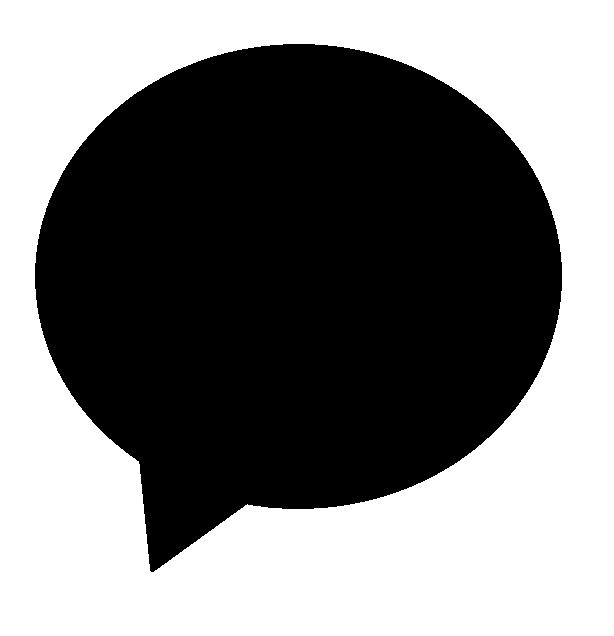

In [34]:
Image.open("data/mask.png")

In [35]:
import numpy as np
mask_array = np.array(Image.open("data/mask.png"))
mask_array

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

옵션정리

alicewc = WordCloud(
    
    background_color = "white",# 배경색 설정

    collocations = False, # 이때 collocations=True 이면 said King, said Hatter 같이 자주 나타나는 단어는 하나의 어구로 분류됨.

    stopwords = stopwords, #불용어 지정

    width = 600, height = 400, #이미지 크기 지정

    colormap = "Reds", # 글씨 색깔 지정

    #font_path = 'path입력'

    min_font_size = 5, max_font_size = 100 #폰트 지정 작게할수록 더 많은 글씨가 보이고 크게하면 글자가 강조됨. 
    
    )

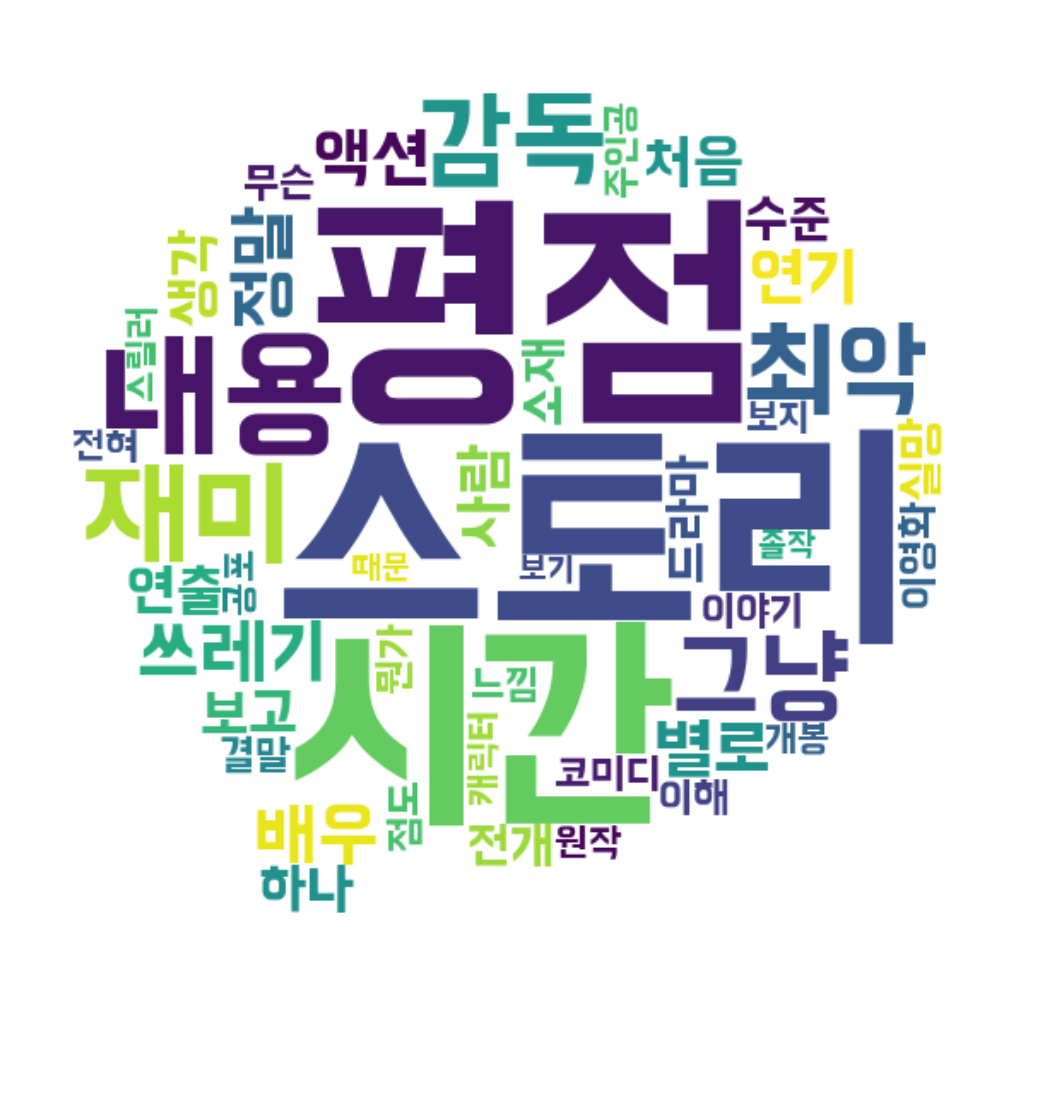

In [36]:
mask1 = np.array(Image.open("data/mask.png"))

wordcloud = WordCloud(font_path = fontpath,
    width = 800,
    height = 800,
    background_color="white",
    mask = mask1,
    min_font_size = 3
)

wordcloud = wordcloud.generate_from_frequencies(negword3)
plt.figure(figsize=(20, 20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()